In [ ]:
!pip install jcopml

In [ ]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from jcopml.pipeline import num_pipe, cat_pipe
from jcopml.utils import save_model, load_model
from jcopml.plot import plot_missing_value
from jcopml.feature_importance import mean_score_decrease

# Import Data

In [ ]:
df = pd.read_csv("/content/dataR2.csv")
df.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


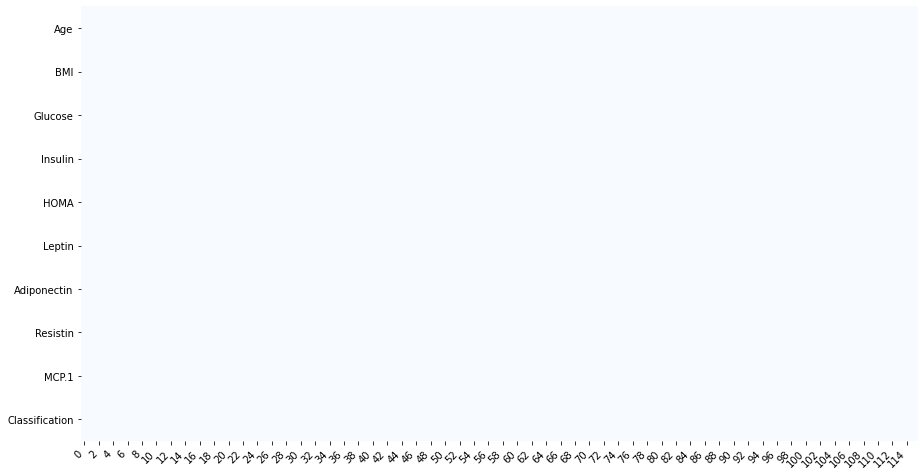

In [ ]:
# Check Missing Values
plot_missing_value(df)

In [ ]:
df.Classification.value_counts()

2    64
1    52
Name: Classification, dtype: int64

# Dataset Splitting

In [ ]:
X = df.drop(columns='Classification')
y = df.Classification

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((92, 9), (24, 9), (92,), (24,))

# Training with Random Forest Classification

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Pipeline
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(), ['Age', 'BMI', 'Glucose', 'Insulin', 'HOMA',
                             'Leptin', 'Adiponectin', 'Resistin', 'MCP.1'])
])

pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', RandomForestClassifier(n_jobs=-1, random_state=42))
])

# Training
model_rf = pipeline
model_rf.fit(X_train, y_train)

# Evaluation
print(model_rf.score(X_train, y_train), model_rf.score(X_test, y_test))

1.0 0.75


# Training with XGBoost Classifier

In [ ]:
from xgboost import XGBClassifier

In [ ]:
# Pipeline
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(), ['Age', 'BMI', 'Glucose', 'Insulin', 'HOMA',
                             'Leptin', 'Adiponectin', 'Resistin', 'MCP.1'])
])

pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', XGBClassifier(n_jobs=-1, random_state=42))
])

# Training
model_xgbc = pipeline
model_xgbc.fit(X_train, y_train)

# Evaluation
print(model_xgbc.score(X_train, y_train), model_xgbc.score(X_test, y_test))

1.0 0.8333333333333334


# Training with SVM Classifier

In [ ]:
from sklearn.svm import SVC

In [ ]:
# Pipeline
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(scaling='standard'), ['Age', 'BMI', 'Glucose', 'Insulin', 'HOMA',
                                               'Leptin', 'Adiponectin', 'Resistin', 'MCP.1'])
])

pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', SVC(random_state=42))
])

# Training
model_svc = pipeline
model_svc.fit(X_train, y_train)

# Evaluation
print(model_svc.score(X_train, y_train), model_svc.score(X_test, y_test))

0.9130434782608695 0.7083333333333334


# Decision Tree 

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Pipeline
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(), ['Age', 'BMI', 'Glucose', 'Insulin', 'HOMA',
                             'Leptin', 'Adiponectin', 'Resistin', 'MCP.1'])
])

pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', XGBClassifier(n_jobs=-1, random_state=42))
])

# Training
model_tree = pipeline
model_tree.fit(X_train, y_train)

# Evaluation
print(model_tree.score(X_train, y_train), model_tree.score(X_test, y_test))

1.0 0.8333333333333334


# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# Pipeline
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(), ['Age', 'BMI', 'Glucose', 'Insulin', 'HOMA',
                             'Leptin', 'Adiponectin', 'Resistin', 'MCP.1'])
])

pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', LogisticRegression(n_jobs=-1, random_state=42))
])

# Training
model_lr = pipeline
model_lr.fit(X_train, y_train)

# Evaluation
print(model_lr.score(X_train, y_train), model_lr.score(X_test, y_test))

0.782608695652174 0.7083333333333334


# Feature Importance

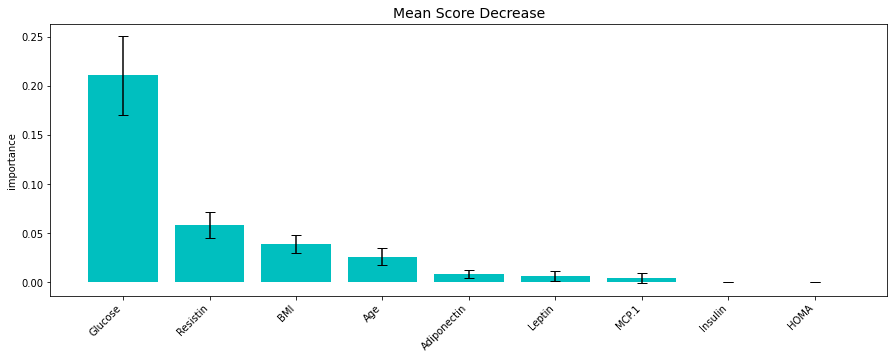

In [ ]:
# Model Random Forest
df_imp = mean_score_decrease(X_train, y_train, model_rf, plot=True, topk=10)

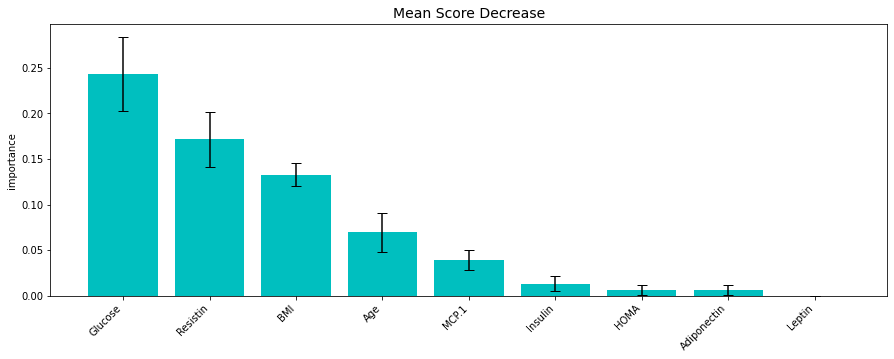

In [ ]:
# Model XGB Classifier
df_imp = mean_score_decrease(X_train, y_train, model_xgbc, plot=True, topk=10)

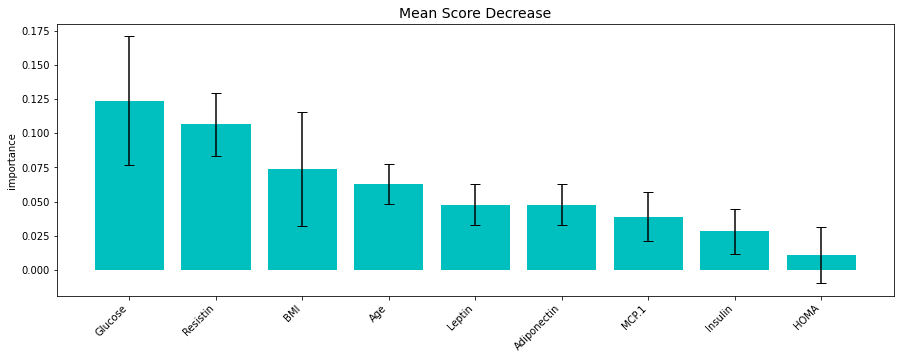

In [ ]:
# Model SVM Classifier
df_imp = mean_score_decrease(X_train, y_train, model_svc, plot=True, topk=10)

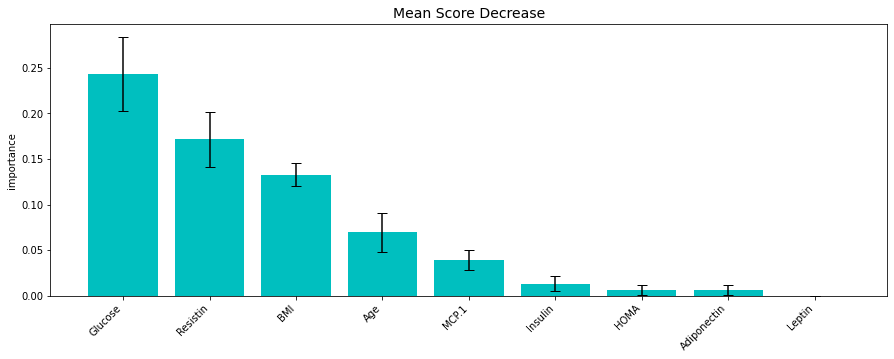

In [ ]:
# Model Decision Tree Classifier
df_imp = mean_score_decrease(X_train, y_train, model_tree, plot=True, topk=10)

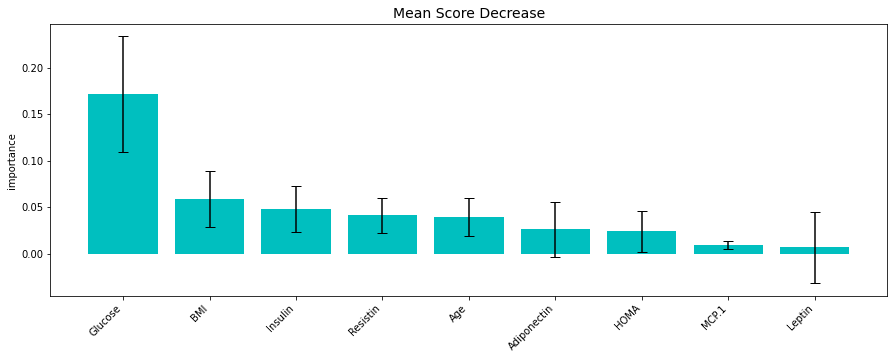

In [ ]:
# Model Logistic Regression
df_imp = mean_score_decrease(X_train, y_train, model_lr, plot=True, topk=10)

# Modeling after Feature Selection

## Random Forest

In [ ]:
# Pipeline
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(), ['Age', 'BMI', 'Glucose', 'Resistin'])
])

pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', RandomForestClassifier(n_jobs=-1, random_state=42))
])

# Training
model_rf = pipeline
model_rf.fit(X_train, y_train)

# Evaluation
print(model_rf.score(X_train, y_train), model_rf.score(X_test, y_test))

1.0 0.8333333333333334


## XGB Classifier

In [ ]:
# Pipeline
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(), ['Age', 'BMI', 'Glucose', 'Resistin'])
])

pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', XGBClassifier(n_jobs=-1, random_state=42))
])

# Training
model_xgbc = pipeline
model_xgbc.fit(X_train, y_train)

# Evaluation
print(model_xgbc.score(X_train, y_train), model_xgbc.score(X_test, y_test))

0.9891304347826086 0.875


## SVM Classifier

In [ ]:
# Pipeline
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(scaling='standard'), ['Age', 'BMI', 'Glucose', 'Resistin'])
])

pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', SVC(random_state=42))
])

# Training
model_svc = pipeline
model_svc.fit(X_train, y_train)

# Evaluation
print(model_svc.score(X_train, y_train), model_svc.score(X_test, y_test))

0.8913043478260869 0.875


## Decision Tree Classifier

In [ ]:
# Pipeline
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(), ['Age', 'BMI', 'Glucose', 'Resistin'])
])

pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', XGBClassifier(n_jobs=-1, random_state=42))
])

# Training
model_tree = pipeline
model_tree.fit(X_train, y_train)

# Evaluation
print(model_tree.score(X_train, y_train), model_tree.score(X_test, y_test))

0.9891304347826086 0.875


## Logistic Regression

In [ ]:
# Pipeline
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(), ['Age', 'BMI', 'Glucose', 'Resistin'])
])

pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', LogisticRegression(n_jobs=-1, random_state=42))
])

# Training
model_lr = pipeline
model_lr.fit(X_train, y_train)

# Evaluation
print(model_lr.score(X_train, y_train), model_lr.score(X_test, y_test))

0.75 0.8333333333333334


# Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
# Model Random Forest
y_pred = model_rf.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[ 8,  3],
       [ 1, 12]])

In [ ]:
# Model XGB Classifier
y_pred = model_xgbc.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[ 9,  2],
       [ 1, 12]])

In [ ]:
# Model SVM Classifier
y_pred = model_svc.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[ 9,  2],
       [ 1, 12]])

In [ ]:
# Model Decision Tree Classifier
y_pred = model_tree.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[ 9,  2],
       [ 1, 12]])